In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
## spinzero
# 2D:

# 3D:
# file_path = "./datas-spin/interacting/n_14_7_7_dim_3_rs_0.3_Theta_0.50_Emax_40_twist_0.250_0.250_0.250/" + \
#      "_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50"  + \
#      "_mcstddev_0.10_lr_0.001_batch_2048_ndevices_1_accsteps_4/data.txt"
    
# file_path = "./datas-spin/interacting/n_14_7_7_dim_3_rs_1.0_Theta_0.50_Emax_40_twist_0.250_0.250_0.250/" + \
#      "_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50" +\
#      "_mcstddev_0.10_lr_0.001_batch_1024_ndevices_1_accsteps_4/data.txt"

# file_path = "./datas-spin/interacting/n_38_19_19_dim_3_rs_1.0_Theta_0.06_Emax_60_twist_0.250_0.250_0.250/" + \
#      "_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50"  + \
#      "_mcstddev_0.10_lr_0.001_batch_256_ndevices_1_accsteps_4/data.txt"
     
# file_path = "./datas-spin/interacting/n_38_19_19_dim_3_rs_10.0_Theta_0.06_Emax_60_twist_0.250_0.250_0.250/"+\
#      "_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50" +\
#           "_mcstddev_0.10_lr_0.001_batch_256_ndevices_1_accsteps_4/data.txt"
          
          
file_path = "./datas-spin/interacting/n_66_33_33_dim_3_rs_10.0_Theta_0.06_Emax_64_twist_0.250_0.250_0.250/" +\
      "_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50" +\
           "_mcstddev_0.10_lr_0.001_batch_128_ndevices_8_accsteps_4/data.txt"
    

In [134]:
with open(file_path, 'r') as file:
    lines = file.readlines()
data = [line.strip().split() for line in lines]
data = np.array(data, dtype=np.float64)
print(data.shape)

(400, 12)


In [135]:
for j in range(data.shape[0]):
    i, F, F_std, E, E_std, K, K_std, V, V_std, S, S_std, acc = data[j]
    print("iter: %04d" % i,
            " F: %.6f (%.6f)" % (F, F_std),
            " E: %.6f (%.6f)" % (E, E_std),
            " K: %.6f (%.6f)" % (K, K_std),
            " V: %.6f (%.6f)" % (V, V_std),
            " S: %.6f (%.6f)" % (S, S_std),
            " acc: %.4f" % acc)

iter: 0001  F: -0.070817 (0.000696)  E: -0.070248 (0.000696)  K: 0.022408 (0.000006)  V: -0.092656 (0.000696)  S: 0.247142 (0.002693)  acc: 0.2930
iter: 0002  F: -0.073258 (0.000654)  E: -0.072744 (0.000654)  K: 0.022401 (0.000008)  V: -0.095145 (0.000654)  S: 0.223074 (0.003106)  acc: 0.3010
iter: 0003  F: -0.070855 (0.000739)  E: -0.070351 (0.000739)  K: 0.022397 (0.000007)  V: -0.092748 (0.000739)  S: 0.218758 (0.003195)  acc: 0.2952
iter: 0004  F: -0.072160 (0.000671)  E: -0.071667 (0.000672)  K: 0.022398 (0.000007)  V: -0.094064 (0.000671)  S: 0.214303 (0.002865)  acc: 0.2984
iter: 0005  F: -0.073877 (0.000698)  E: -0.073398 (0.000698)  K: 0.022388 (0.000007)  V: -0.095786 (0.000699)  S: 0.208070 (0.003064)  acc: 0.3013
iter: 0006  F: -0.072293 (0.000713)  E: -0.071810 (0.000713)  K: 0.022391 (0.000007)  V: -0.094201 (0.000713)  S: 0.209960 (0.002932)  acc: 0.2943
iter: 0007  F: -0.072306 (0.000668)  E: -0.071827 (0.000668)  K: 0.022394 (0.000007)  V: -0.094221 (0.000668)  S: 0.20

In [136]:
def wrap_text(text, width):
    return '\n'.join([text[i:i+width] for i in range(0, len(text), width)])

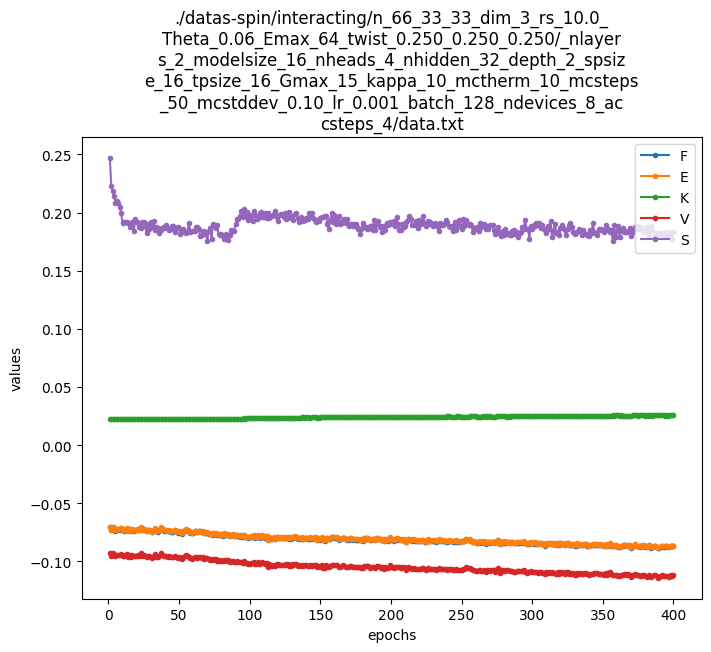

In [137]:
fig = plt.figure(figsize=(8, 6))
title_str = wrap_text(file_path, 50)
plt.title(title_str)    
## F E K V S
plt.plot(data[:, 0], data[:, 1], marker='.')
plt.plot(data[:, 0], data[:, 3], marker='.')
plt.plot(data[:, 0], data[:, 5], marker='.')
plt.plot(data[:, 0], data[:, 7], marker='.')
plt.plot(data[:, 0], data[:, 9], marker='.')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend(['F','E','K','V','S'])
plt.show()

In [138]:
## Benchmark
Bx = [1, data.shape[0]]
ByK = 41.7986
ByV = -3.46152
ByE = ByK + ByV

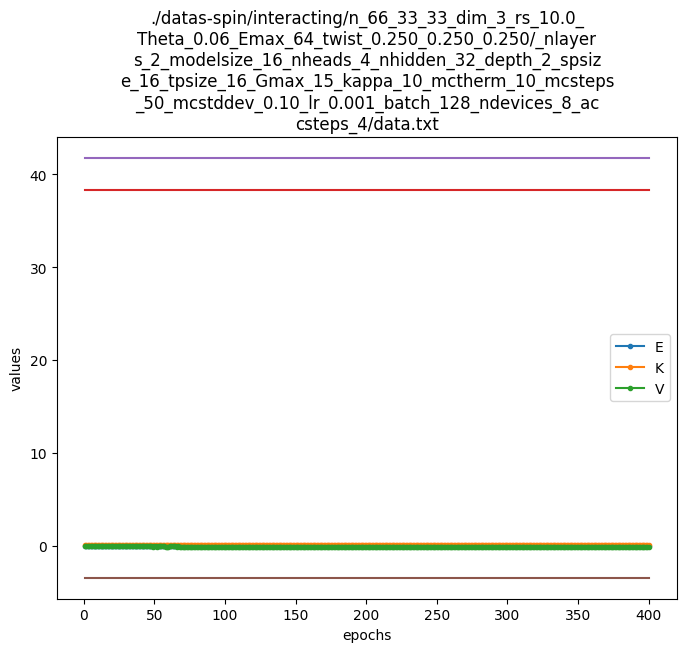

In [139]:
fig = plt.figure(figsize=(8, 6))
title_str = wrap_text(file_path, 50)
plt.title(title_str)    
## E K V
plt.plot(data[:, 0], data[:, 3], marker='.')#E
plt.plot(data[:, 0], data[:, 5], marker='.')#K
plt.plot(data[:, 0], data[:, 7], marker='.')#V

plt.plot(Bx, [ByE, ByE])
plt.plot(Bx, [ByK, ByK])
plt.plot(Bx, [ByV, ByV])

plt.xlabel('epochs')
plt.ylabel('values')
plt.legend(['E','K','V'])
#plt.ylim([-2,5])
plt.show()